In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

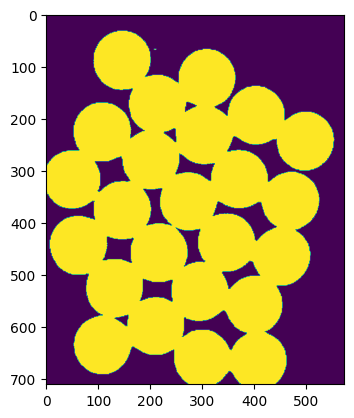

In [14]:
img = cv2.imread('input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

In [15]:
#Removing noise using erosion and dilation
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

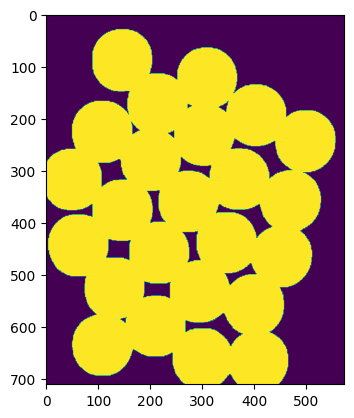

In [16]:
# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)
plt.imshow(sure_bg)
plt.show()

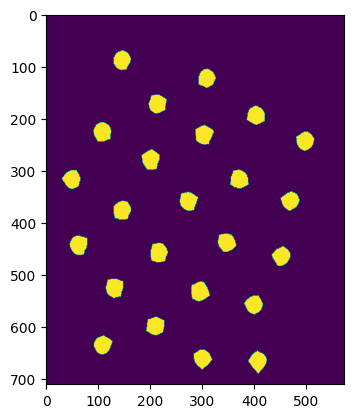

In [17]:
#sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

plt.imshow(sure_fg)
plt.show()

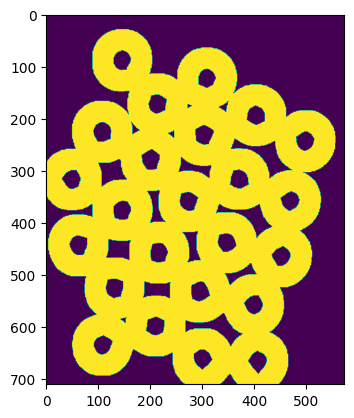

In [18]:
# Finding unknown regions
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown)
plt.show()

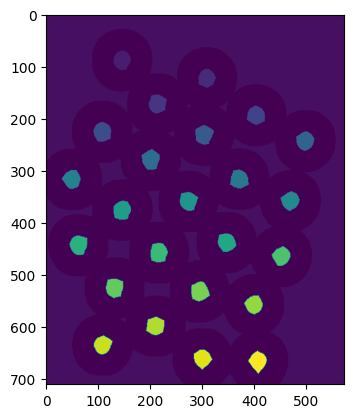

In [20]:
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so background is not 0
markers = markers + 1
markers[unknown == 255] = 0

plt.imshow(markers)
plt.show()

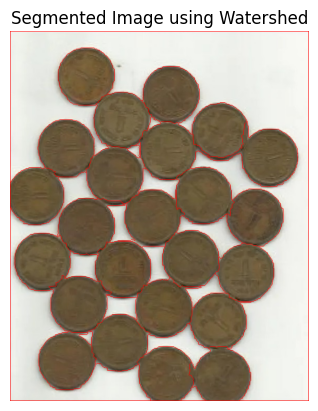

In [22]:
markers = cv2.watershed(img, markers)

img[markers == -1] = [0, 0, 255] 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image using Watershed')
plt.axis('off')
plt.show()